### Python module/package imports for this chapter

In [3]:
import sys, math, collections, itertools, multiprocessing, gzip

In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [5]:
%load_ext line_profiler
%load_ext memory_profiler

ModuleNotFoundError: No module named 'line_profiler'

**March 2020 update**

* at 03:55 in the video: with recent versions of Jupyter notebook, `multiprocessing.Pool` is unable to access the function `compute_mandel_numpy`, which is defined in the notebook. The workaround is to define it within an imported module (`compute_mandel.py`) in this directory instead. It remains possible to work outside the notebook, and experiment with the script `run_mandel_mp.py`, as suggested in the video for the Windows platform.

## Computing Mandelbrot in parallel 

In [6]:
def compute_mandel_numpy(c,maxit=256):
    escaped = np.full_like(c,np.inf,'d')
    z = np.zeros_like(c,'c16')
    
    for it in range(1,maxit):
        z = np.where(escaped == np.inf,z**2 + c,0)        
        escaped[np.abs(z) > 2.0] = it

    return escaped
        
def run_mandel_numpy(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)
    ys = np.linspace(extent[2],extent[3],res)
    
    c = xs[:,np.newaxis] + 1j*ys[np.newaxis,:]

    escaped = compute_mandel_numpy(c,maxit)
    
    return escaped / maxit

In [7]:
def plot_mandel(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256,run_mandel=run_mandel_numpy):
    pp.figure(figsize=(6,6))

    cmap = matplotlib.cm.coolwarm
    cmap.set_bad('k')

    pp.imshow(run_mandel(extent,res,maxit).T,extent=extent,
              cmap=cmap,norm=matplotlib.colors.PowerNorm(0.6),
              interpolation='none',origin='lower')

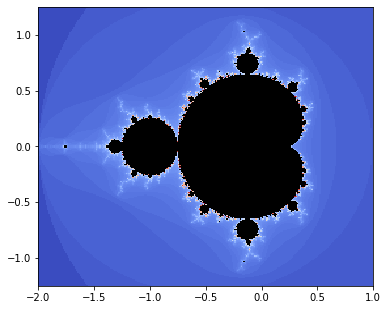

In [8]:
plot_mandel(run_mandel=run_mandel_numpy)

In [10]:
%timeit run_mandel_numpy()

647 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
def run_mandel_rows(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)
    ys = np.linspace(extent[2],extent[3],res)
    
    c = xs[:,np.newaxis] + 1j*ys[np.newaxis,:]
    escaped_rows = [compute_mandel_numpy(c,maxit) for c_row in c]
    
    return np.vstack(escaped_rows) / maxit

In [ ]:
%timeit run_mandel_rows()

In [ ]:
def run_mandel_chunked(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)
    ys = np.linspace(extent[2],extent[3],res)
    
    chunksize = 32
    c = xs[:,np.newaxis] + 1j*ys[np.newaxis,:]
    escaped_chunk = [compute_mandel_numpy(c[i:i+chunksize,:],maxit) for c_row in range(0,res,chunksize)]
    
    return np.vstack(escaped_chunk) / maxit

In [ ]:
%timeit run_mandel_chunked()

## Starting Multiple Proccess:
<p> Python can't be multi threaded but is able to run several parallel proccess. On windows multi proccessing doesnt work with jupyter notebooks. </p>

In [ ]:
def run_mandel_mp(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)
    ys = np.linspace(extent[2],extent[3],res)
    
    chunksize = 32
    c = xs[:,np.newaxis] + 1j*ys[np.newaxis,:]
    
    #Create mutli proccess
    pool = multi.processing.Pool(proccesses=4) #create 4
    escaped_chunk = pool.map(compute_mandel_numpy,{c[i:i+chunksize,:] for c_row in range(0,res,chunksize)}) #function to be ran, size of chunk,conditional
    pool.close
    
    return np.vstack(escaped_chunk) / maxit

In [ ]:
plot_mandel(run_mandel=run_mandel_mp)

In [ ]:
%timeit run_mandel_chunked(run_mandel_mp)